* **Name: Magnus Aghe** 
* **Student ID: 900400010** 
* **Email: m.aghe0010@student.nu.edu** 
* **Course: ANA615 PROJECT - LOAN DEFAULT PREDICTION**

Your final project will require you to leverage several of the techniques we have discussed throughout
the duration of this course. The project scope will require that you use an existing dataset to predict the
likelihood of loan default using a publicly available dataset on loan defaults. The original dataset comes
from Lending Club (https://www.lendingclub.com/). The dataset contains all loans approved from 2007
to Q42018. Please review the data dictionary for a detailed explanation of all of the variables included
in the dataset.

The purpose of this project will be as follows:

1. Bring the data into Python

2. Conduct exploratory data analysis (EDA) on the dataset

    a. These include tasks such as

    i. Correlation analysis

    ii. Missing data

    iii. Relationship of features to target (charge-off)

    iv. Dimension reduction (if necessary)

3. Create a decision tree predicting the likelihood of default.

4. The results of the predictive model you build should include a review of feature importance, 
predictive accuracy, lift/ROC charts and confusion matrices

Upon completion of the project you will submit your Jupyter notebook with appropriate write-up (in
markdown format) along with results, recommendations and final model you would select going
forward.

Several important points.

1. The target is not defined in the raw data file. You will need to create it from an existing feature.

2. There are features in the dataset that are included at the time the lending decision was made,
as well as those that were tracked after the loan was made. It is crucially important that you do
not include any of the “future” information in your predictive model. A sign of this (referred to
as target leakage) is extremely accurate model results (i.e., >90% accuracy).

3. Please make sure that you divide your data into a testing and validation set at a minimum.
Please feel free to do additional types of validation (i.e., k-fold cross validation)

4. Please also feel free to use other techniques used in the course to create new features to add as
predictors (i.e., knn or cluster analysis, for example). Although this is not necessary please do
not feel limited by only what is included.

Please do not hesitate to reach out to your instructor with any questions.

### SOLUTION

   **Step 1: DETERMINE THE PURPOSE**
     
   The purpose of this project is to predict the likelihood of loan default using the Lending Club dataset (2007 to Q42018).

**Step 2: BRINGING IN THE DATA**

Import required packages needed for this project.

In [1]:
from pathlib import Path

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt 

from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

In [3]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [4]:
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dmba import plotDecisionTree, gainsChart, liftChart
import statsmodels.formula.api as sm
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score #, BIC_score

In [5]:
from sklearn.metrics import pairwise
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor #, NearestNeighbors

from scipy.spatial.distance import cosine
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity

from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic

from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [6]:
# Load data
df = pd.read_csv ('accepted_2007_to_2018Q4.csv')

# data dimension
df.shape

C:\Users\magnu\AppData\Local\Temp\ipykernel_3300\1850372815.py:2: DtypeWarning: Columns (0,19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('accepted_2007_to_2018Q4.csv')


(1048575, 151)

In [7]:
# Show the first 5 rows

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Show the bottom 5 rows

df.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1048570,72663394,NaN,14400.0,14400.0,14400.0,36 months,16.29,508.33,D,D1,...,NaN,NaN,Cash,Y,May-18,COMPLETE,Apr-17,5510.0,42.58,12.0
1048571,72673678,NaN,10000.0,10000.0,10000.0,36 months,11.47,329.62,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1048572,72663353,NaN,16000.0,16000.0,16000.0,36 months,10.75,521.93,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1048573,72785737,NaN,6000.0,6000.0,6000.0,36 months,7.89,187.72,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1048574,72573375,NaN,1000.0,1000.0,1000.0,36 months,6.49,30.65,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 1,048,575 records and 151 variables. 

**Step 3: EXPLORE, CLEAN, AND PREPROCESS THE DATA**

In [9]:
# Print variable names

print (df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


In [10]:
# Select only variables to be used in this project as predictor and outcome variables

loan_df = df [["loan_amnt", "int_rate", "installment", "loan_status", "home_ownership", "annual_inc", "dti", "fico_range_high"]]
loan_df.head()

,loan_amnt,int_rate,installment,loan_status,home_ownership,annual_inc,dti,fico_range_high
0,3600.0,13.99,123.03,Fully Paid,MORTGAGE,55000.0,5.91,679.0
1,24700.0,11.99,820.28,Fully Paid,MORTGAGE,65000.0,16.06,719.0
2,20000.0,10.78,432.66,Fully Paid,MORTGAGE,63000.0,10.78,699.0
3,35000.0,14.85,829.90,Current,MORTGAGE,110000.0,17.06,789.0
4,10400.0,22.45,289.91,Fully Paid,MORTGAGE,104433.0,25.37,699.0


In [11]:
# variable dat types

loan_df.dtypes

loan_amnt          float64
int_rate           float64
installment        float64
loan_status         object
home_ownership      object
annual_inc         float64
dti                float64
fico_range_high    float64
dtype: object

In [12]:
# Let's convert home_ownership to a dummy variable

loan_df_homeown = pd.get_dummies (loan_df ['home_ownership'], prefix_sep = '_', drop_first = True)
new_df = pd.concat([loan_df, loan_df_homeown], axis = 1)
new_df.head()

,loan_amnt,int_rate,installment,loan_status,home_ownership,annual_inc,dti,fico_range_high,MORTGAGE,NONE,OWN,RENT
0,3600.0,13.99,123.03,Fully Paid,MORTGAGE,55000.0,5.91,679.0,1,0,0,0
1,24700.0,11.99,820.28,Fully Paid,MORTGAGE,65000.0,16.06,719.0,1,0,0,0
2,20000.0,10.78,432.66,Fully Paid,MORTGAGE,63000.0,10.78,699.0,1,0,0,0
3,35000.0,14.85,829.90,Current,MORTGAGE,110000.0,17.06,789.0,1,0,0,0
4,10400.0,22.45,289.91,Fully Paid,MORTGAGE,104433.0,25.37,699.0,1,0,0,0


In [13]:
# Since we want to predict loan default, we need to create a new column as our target variable 
# that shows loan-status 'Charged off' as 1 and others as 0.

new_df['loan_default'] = np.where (new_df['loan_status'] == 'Charged Off', 1, 0)
new_df.head()

,loan_amnt,int_rate,installment,loan_status,home_ownership,annual_inc,dti,fico_range_high,MORTGAGE,NONE,OWN,RENT,loan_default
0,3600.0,13.99,123.03,Fully Paid,MORTGAGE,55000.0,5.91,679.0,1,0,0,0,0
1,24700.0,11.99,820.28,Fully Paid,MORTGAGE,65000.0,16.06,719.0,1,0,0,0,0
2,20000.0,10.78,432.66,Fully Paid,MORTGAGE,63000.0,10.78,699.0,1,0,0,0,0
3,35000.0,14.85,829.90,Current,MORTGAGE,110000.0,17.06,789.0,1,0,0,0,0
4,10400.0,22.45,289.91,Fully Paid,MORTGAGE,104433.0,25.37,699.0,1,0,0,0,0


In [14]:
# Let's check the summary statistics

new_df.describe().round(1)

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_high,MORTGAGE,NONE,OWN,RENT,loan_default
count,1048563.0,1048563.0,1048563.0,1048563.0,1047707.0,1048563.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0
mean,15250.1,12.8,447.8,78267.6,19.3,702.2,0.5,0.0,0.1,0.4,0.1
std,9227.3,4.9,267.0,130923.6,14.8,33.1,0.5,0.0,0.3,0.5,0.3
min,1000.0,5.3,14.0,0.0,-1.0,664.0,0.0,0.0,0.0,0.0,0.0
25%,8000.0,9.2,254.2,46000.0,12.2,674.0,0.0,0.0,0.0,0.0,0.0
50%,13200.0,12.3,379.8,65000.0,18.3,694.0,0.0,0.0,0.0,0.0,0.0
75%,20000.0,15.6,595.5,94000.0,25.2,719.0,1.0,0.0,0.0,1.0,0.0
max,40000.0,31.0,1719.8,110000000.0,999.0,850.0,1.0,1.0,1.0,1.0,1.0


In [21]:
print ('Number of missing values : ', new_df.loan_amnt.isnull().sum())

Number of missing values :  12


In [22]:
print ('Number of missing values : ', new_df.dti.isnull().sum())

Number of missing values :  868


From our dataset, looking at the summary statistics of our selected variables:-

*loan_amnt*

The minimum loan amount applied for was 1,000 dollars and the maximum was 40,000 dollars. There were 12 missing values. The average loan amount applied for was 15,250 dollars.

*int_rate*

The minimum interest rate applied for was 5.3 percent and the maximum was 31 percent. There were 12 missing values. The average interest rate was 12.8 percent.

*installment*

The minimum monthly installment to be paid was 14 dollars and the maximum was 1,719 dollars, with a mean value of 447.8 dollars. There were 12 missing values.

*annual_inc*

The minimum annual income of a prospective borrower was 0 dollars, and the maximum was 110 million dollars. These values are outliers. The mean value is 78,267.60 dollars and the median annual income is 65,000 dollars. There were 12 missing values.

*dti*

The minimum debt to income ratio (dti) is minus 1 (-1),  and the maximum is 999. These values are outliers. The mean is 19.3 and there were 868 missing values in the dataset.

*fico_range_high*

The minimum fico score (upper limit) is 664, and the maximum is a perfect score of 850. The mean fico score (upper limit) is 702.2, and there are 12 missing values in the data.

*home_ownership*

There are no missing values for home ownership because they are already dummy variables (Mortgage, Own, Rent, None).

*loan_default*

There are no missing values for loan default, because they are already classified as (1 = charged-off, 0 = not charged-off).

Treating the missing values.

In [24]:
# We shall replace the missing values using the median of the remaining values.

medianloan_amnt = new_df['loan_amnt'].median()
new_df.loan_amnt = new_df.loan_amnt.fillna(value=medianloan_amnt)
print('Number of rows with valid loan_amnt values after filling NA values: ',
       new_df['loan_amnt'].count())

medianint_rate = new_df['int_rate'].median()
new_df.int_rate = new_df.int_rate.fillna(value=medianint_rate)
print('Number of rows with valid int_rate values after filling NA values: ',
       new_df['int_rate'].count())

medianinstallment = new_df['installment'].median()
new_df.installment = new_df.installment.fillna(value=medianinstallment)
print('Number of rows with valid installment values after filling NA values: ',
       new_df['installment'].count())

medianannual_inc = new_df['annual_inc'].median()
new_df.annual_inc = new_df.annual_inc.fillna(value=medianannual_inc)
print('Number of rows with valid annual_inc values after filling NA values: ',
       new_df['annual_inc'].count())

mediandti = new_df['dti'].median()
new_df.dti = new_df.dti.fillna(value=mediandti)
print('Number of rows with valid dti values after filling NA values: ',
       new_df['dti'].count())

medianfico_range_high = new_df['fico_range_high'].median()
new_df.fico_range_high = new_df.fico_range_high.fillna(value=medianfico_range_high)
print('Number of rows with valid fico_range_high values after filling NA values: ',
       new_df['fico_range_high'].count())

Number of rows with valid loan_amnt values after filling NA values:  1048575
Number of rows with valid int_rate values after filling NA values:  1048575
Number of rows with valid installment values after filling NA values:  1048575
Number of rows with valid annual_inc values after filling NA values:  1048575
Number of rows with valid dti values after filling NA values:  1048575
Number of rows with valid fico_range_high values after filling NA values:  1048575


Now we shall plot a histogram for each of the quantitative variables.

Text(0, 0.5, 'count')

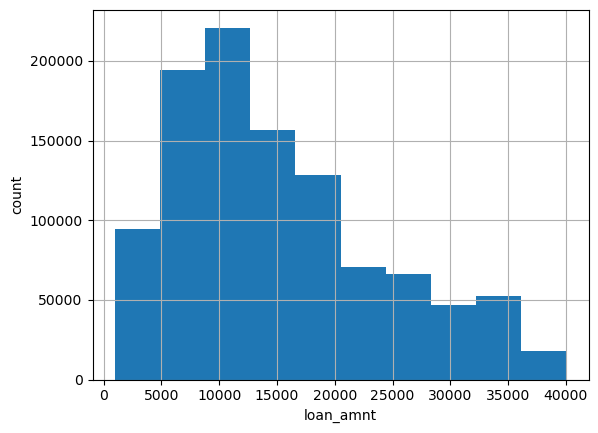

In [25]:
## histogram of loan_amnt

ax = new_df.loan_amnt.hist()
ax.set_xlabel('loan_amnt'); ax.set_ylabel('count')

Text(0, 0.5, 'count')

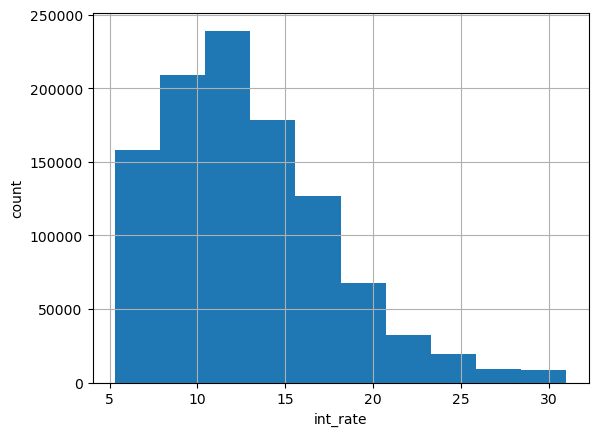

In [26]:
## histogram of int_rate

ax = new_df.int_rate.hist()
ax.set_xlabel('int_rate'); ax.set_ylabel('count')

Text(0, 0.5, 'count')

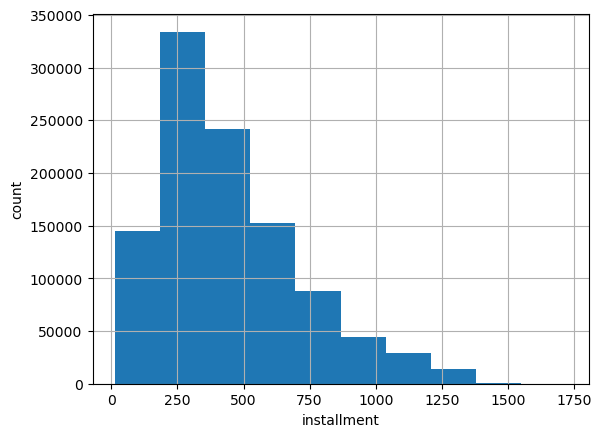

In [27]:
## histogram of installment

ax = new_df.installment.hist()
ax.set_xlabel('installment'); ax.set_ylabel('count')

Text(0, 0.5, 'count')

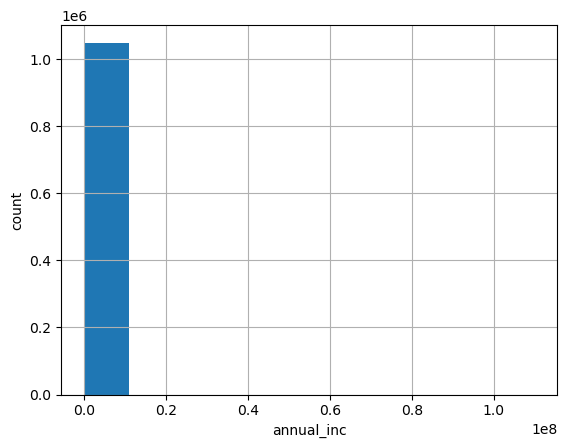

In [28]:
## histogram of annual_inc

ax = new_df.annual_inc.hist()
ax.set_xlabel('annual_inc'); ax.set_ylabel('count')

Text(0, 0.5, 'count')

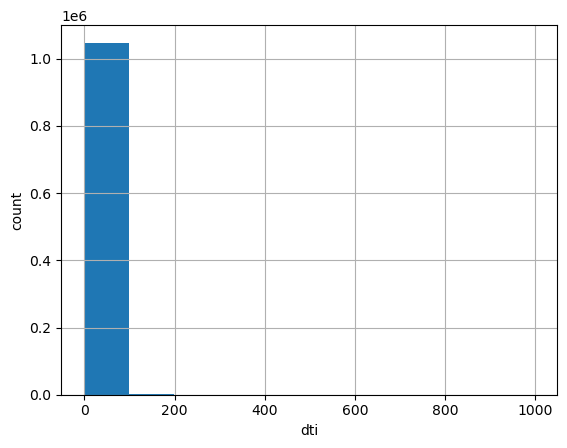

In [29]:
## histogram of dti

ax = new_df.dti.hist()
ax.set_xlabel('dti'); ax.set_ylabel('count')

Text(0, 0.5, 'count')

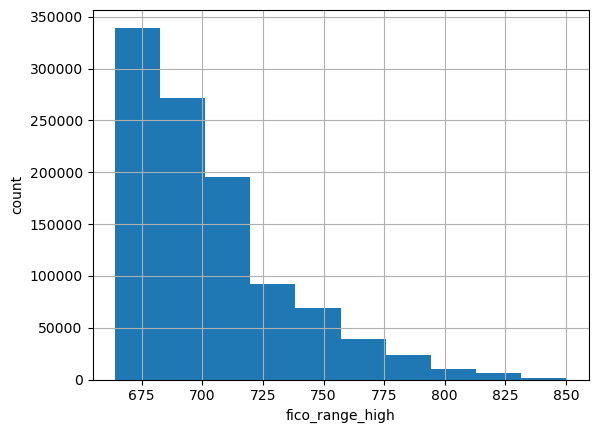

In [30]:
## histogram of loan_amnt

ax = new_df.fico_range_high.hist()
ax.set_xlabel('fico_range_high'); ax.set_ylabel('count')

From the above we can see that the histograms of loan_amnt, int_rate, installment and fico_range_high are all right-skewed with the exception of annual_inc and dti which have one bar each because of the extreme values/outliers in them.

loan_amnt, int_rate, installment, and fico_range_high all have the same pattern of variability.

Now we shall do a correlation analysis of the quantitative variables.

In [31]:
new_df.corr().round(2)

C:\Users\magnu\AppData\Local\Temp\ipykernel_3300\1583926549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr().round(2)


,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_high,MORTGAGE,NONE,OWN,RENT,loan_default
loan_amnt,1.00,0.09,0.94,0.17,0.04,0.12,0.18,0.00,-0.02,-0.16,0.02
int_rate,0.09,1.00,0.12,-0.05,0.13,-0.40,-0.07,-0.00,0.00,0.07,0.20
installment,0.94,0.12,1.00,0.17,0.04,0.06,0.14,0.00,-0.02,-0.13,0.02
annual_inc,0.17,-0.05,0.17,1.00,-0.07,0.03,0.08,-0.00,-0.01,-0.07,-0.02
dti,0.04,0.13,0.04,-0.07,1.00,-0.02,0.03,0.01,0.01,-0.03,0.04
fico_range_high,0.12,-0.40,0.06,0.03,-0.02,1.00,0.09,0.00,0.02,-0.11,-0.13
MORTGAGE,0.18,-0.07,0.14,0.08,0.03,0.09,1.00,-0.00,-0.35,-0.79,-0.06
NONE,0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,1.00,-0.00,-0.00,-0.00
OWN,-0.02,0.00,-0.02,-0.01,0.01,0.02,-0.35,-0.00,1.00,-0.29,0.00
RENT,-0.16,0.07,-0.13,-0.07,-0.03,-0.11,-0.79,-0.00,-0.29,1.00,0.06


In [33]:
# Let us normalize the data first and do the correlation analysis again.

normnew_df = (new_df - new_df.mean())/new_df.std()
normnew_df.corr().round(2)

C:\Users\magnu\AppData\Local\Temp\ipykernel_3300\4094980861.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normnew_df = (new_df - new_df.mean())/new_df.std()
C:\Users\magnu\AppData\Local\Temp\ipykernel_3300\4094980861.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normnew_df = (new_df - new_df.mean())/new_df.std()
C:\Users\magnu\AppData\Local\Temp\ipykernel_3300\4094980861.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only vali

,MORTGAGE,NONE,OWN,RENT,annual_inc,dti,fico_range_high,installment,int_rate,loan_amnt,loan_default
MORTGAGE,1.00,-0.00,-0.35,-0.79,0.08,0.03,0.09,0.14,-0.07,0.18,-0.06
NONE,-0.00,1.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,-0.00,0.00,-0.00
OWN,-0.35,-0.00,1.00,-0.29,-0.01,0.01,0.02,-0.02,0.00,-0.02,0.00
RENT,-0.79,-0.00,-0.29,1.00,-0.07,-0.03,-0.11,-0.13,0.07,-0.16,0.06
annual_inc,0.08,-0.00,-0.01,-0.07,1.00,-0.07,0.03,0.17,-0.05,0.17,-0.02
dti,0.03,0.01,0.01,-0.03,-0.07,1.00,-0.02,0.04,0.13,0.04,0.04
fico_range_high,0.09,0.00,0.02,-0.11,0.03,-0.02,1.00,0.06,-0.40,0.12,-0.13
installment,0.14,0.00,-0.02,-0.13,0.17,0.04,0.06,1.00,0.12,0.94,0.02
int_rate,-0.07,-0.00,0.00,0.07,-0.05,0.13,-0.40,0.12,1.00,0.09,0.20
loan_amnt,0.18,0.00,-0.02,-0.16,0.17,0.04,0.12,0.94,0.09,1.00,0.02


C:\Users\magnu\AppData\Local\Temp\ipykernel_3300\604772107.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_df.corr()


<Axes: >

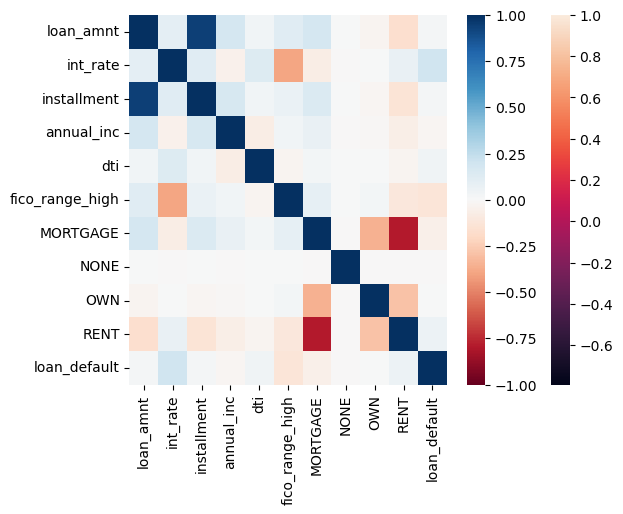

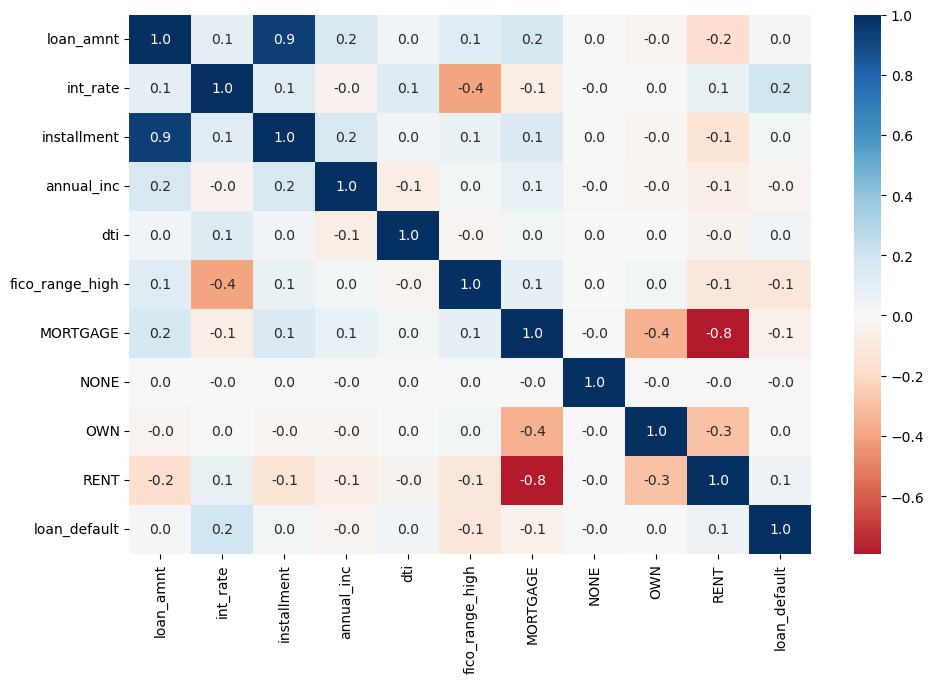

In [34]:
## simple heatmap of correlations (without values)

corr = new_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1,
vmax=1, cmap="RdBu")

# Include information about values (example demonstrate how to control the size of
# the plot

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

**Correlation Analysis**

The magnitude of the correlation changes after normalizing the data. From the correlation matrix heatmap, we observe the following:-

*There is no correlation between loan_default and loan_amount. (0.0)*  
*There is a slightly negative correlation between loan_default and fico_range_high. (-0.1)*
*The highest correlation between loan_default and a predictor variable is int_rate (0.2)*

This implies that even though it is shows a low correlation, interest rate explains a bit more of the variation seen in loan defaults than any other predictor variable we have chosen.

Also, high fico scores slightly show there will be a low possibility of loan default. In fact, the higher the fico score, the more likelihood that there will not be a loan default. However this correlation is very low, (almost zero).


**Step 4: DETERMINE THE DATA MINING TASK, STEP 5: PARTITION THE DATA & STEP 6: CHOOSE THE DATA MINING TECHNIQUE**

Our data mining task is to predict the likelihood of default. Since our target/outcome variable is
loan_default, which is a categorical variable, our task is a classification (Loan Default = 1/No Loan Default = 0).

We shall partition the data into two parts, training set and validation set, in a 60-40 split ratio.

We shall use Classification Tree (CT) as our data mining technique. 

In [36]:
new_df.head()

,loan_amnt,int_rate,installment,loan_status,home_ownership,annual_inc,dti,fico_range_high,MORTGAGE,NONE,OWN,RENT,loan_default
0,3600.0,13.99,123.03,Fully Paid,MORTGAGE,55000.0,5.91,679.0,1,0,0,0,0
1,24700.0,11.99,820.28,Fully Paid,MORTGAGE,65000.0,16.06,719.0,1,0,0,0,0
2,20000.0,10.78,432.66,Fully Paid,MORTGAGE,63000.0,10.78,699.0,1,0,0,0,0
3,35000.0,14.85,829.90,Current,MORTGAGE,110000.0,17.06,789.0,1,0,0,0,0
4,10400.0,22.45,289.91,Fully Paid,MORTGAGE,104433.0,25.37,699.0,1,0,0,0,0


In [37]:
new_df.drop (columns = ['home_ownership', 'loan_status'], inplace = True)

In [38]:
# Here, we separate out our predictors and target variable

X = new_df.drop (columns = ['loan_default'])
y = new_df ['loan_default']

In [39]:
# We partition the data into 60% training data, and 40% validation data. 
# Set random_state = 1, for reproducibility of results.

train_X, valid_X, train_y, valid_y = train_test_split (X, y, test_size = 0.4, random_state = 1)

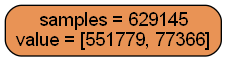

In [46]:
# We run the smaller classification tree because a full Classification tree has danger of overfitting, 
# but will perform poorly on new data..

smallClassTree = DecisionTreeClassifier (max_depth = 50, min_samples_split = 20, 
                                         min_impurity_decrease = 0.01, random_state = 1)
smallClassTree.fit (train_X, train_y)

plotDecisionTree (smallClassTree, feature_names = train_X.columns)

In [47]:
# Let's classify the validation data and compute the confusion matrices and accuracy for the training and validation data.

classificationSummary (train_y, smallClassTree.predict (train_X))

Confusion Matrix (Accuracy 0.8770)

       Prediction
Actual      0      1
     0 551779      0
     1  77366      0


In [48]:

classificationSummary (valid_y, smallClassTree.predict (valid_X))

Confusion Matrix (Accuracy 0.8764)

       Prediction
Actual      0      1
     0 367609      0
     1  51821      0


With the training data, the classification tree has an accuracy of 0.8770 using smallTree.
With the validation data, the classification tree has an accuracy of 0.8764 using smallTree.

In [49]:
# Let us use GridSearchCV to fine-tune method parameters and find the optimized tree. 
# We shall use the k-fold cross validation also and start with an initial guess for parameters.

param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007], 
    'min_samples_split': [8, 9, 10, 11, 12, 13], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

optClassTree = gridSearch.best_estimator_
importanceCT = pd.DataFrame({'features': train_X.columns, 
                             'importance': optClassTree.feature_importances_})

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 8}


Tree has 3 nodes


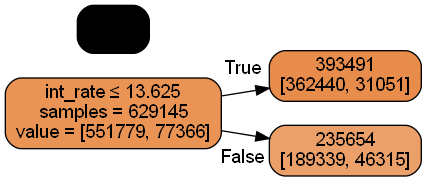

In [50]:
# plot the tree

print('Tree has {} nodes'.format(optClassTree.tree_.node_count))
plotDecisionTree(optClassTree, feature_names=train_X.columns, rotate=True)

In [51]:
# Evaluating performance
# Let's classify the validation data and compute the confusion matrices and accuracy for the training and validation data.

print('training set:')
classificationSummary(train_y, optClassTree.predict(train_X))
print('\nvalidation set:')
classificationSummary(valid_y, optClassTree.predict(valid_X))

training set:
Confusion Matrix (Accuracy 0.8770)

       Prediction
Actual      0      1
     0 551779      0
     1  77366      0

validation set:
Confusion Matrix (Accuracy 0.8764)

       Prediction
Actual      0      1
     0 367609      0
     1  51821      0


We got the same accuracy for the optimized tree (compared with the small classification tree). 

With the training data, the classification tree has an accuracy of 0.8770. With the validation data, the classification tree has an accuracy of 0.8764.

In [53]:
# variable importance for classification tree

importanceCT.sort_values(by='importance', ascending=False).head(5)

,features,importance
1,int_rate,1.0
0,loan_amnt,0.0
2,installment,0.0
3,annual_inc,0.0
4,dti,0.0


From the above, we can see that int_rate (interest rate) is the most (only) important feature variable amongst our chosen predictors.

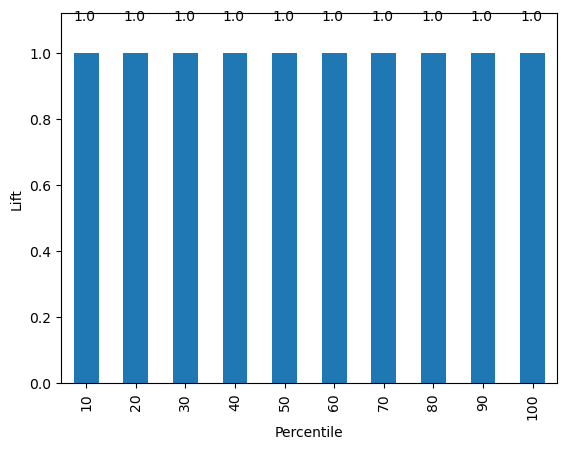

In [55]:
# Create the information for the lift chart

proba = smallClassTree.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': smallClassTree.predict(valid_X) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['p(1)'], title=False)
plt.show()

As we can see, the lift on the first decile is 1.0.

**Recommendation**

Our model has an 87.7% accuracy on the training data and an 87.64% accuracy on the validation data. The errors in both are from false negatives. This is because the model predicts that no one would default in their loan, however, 77,366 (representing 12.3%) records in the training data defaulted. Similarly, 51,821 (representing 12.36%) records defaulted.

The model is stable because it performs comparably on both training and validation data set. Perhaps, with more important predictor variables, the accuracy would improve. 